`Task 3:`**Iris Flower Prediction**

`Done by:Mohamad Moallem`

In [76]:
import pandas as pd#for cleaning and manipulating data#
import numpy as np#for mathmatical computation and array manipulation#
import matplotlib.pyplot as plt#for data visualization#
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import accuracy_score,r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

lets start by loading our data set and understanding it 

In [77]:
data_set = pd.read_csv("IRIS.csv")
data_set.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [78]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [79]:
data_set.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [80]:
data_set.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

it seems that our dataset has no null values which actually helps us alot since we will not need to fill the missing values now lets check for duplicates

In [81]:
data_set.duplicated().sum()

3

it seems that we have 3 duplicated rows lets get rid of them

In [82]:
data_set.drop_duplicates(inplace=True)

lets recheck again

In [83]:
data_set.duplicated().sum()

0

now lets start by transforming the categorical data in the column species by numerical data 

In [84]:
data_set['species'].value_counts()

species
Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: count, dtype: int64

we have three different categoris so the best way to transform them into numerical values is by using labelencoder

In [85]:
le=LabelEncoder()
data_set['species']=le.fit_transform(data_set['species'])

In [86]:
data_set.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [87]:
data_set['species'].value_counts()

species
1    50
2    49
0    48
Name: count, dtype: int64

now we have 1 for versiclor, 2 for virginica, and 0 for setosa

now thats done lets Visualize our data and check there correlation with each other 

<Axes: >

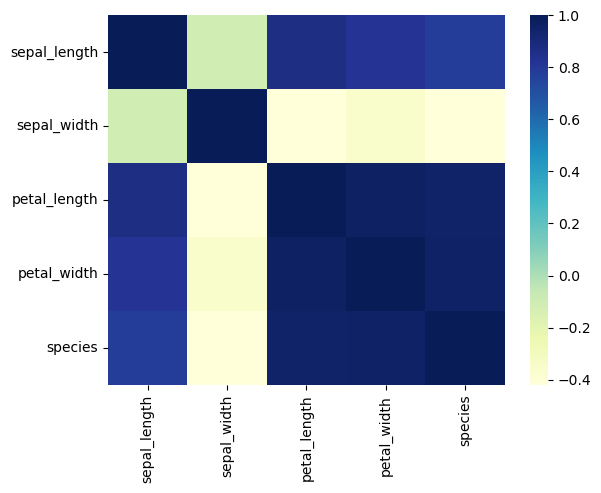

In [88]:
sns.heatmap(data_set.corr(numeric_only=True),cmap="YlGnBu")

In [89]:
corr_matrix=data_set.corr()
display(corr_matrix['species'].value_counts(ascending=True))

species
 0.782904    1
-0.418348    1
 0.948339    1
 0.955693    1
 1.000000    1
Name: count, dtype: int64

we can see strong postive correlation between sepal_lenght,petal_width,petal_lenght and species we also can see a some what strong negative correaltion between sepal_width and species

now lets start by splitting our data set into training data and testing data

In [90]:
X = data_set.drop('species', axis=1)
y = data_set['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,train_size=0.8, random_state=42)

In [91]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(117, 4)
(30, 4)
(117,)
(30,)


now that we have prepared our training and testing set we can start by building our model i am going to use both knn_classifier and logistic regression and choose the one that yeilds better results

In [92]:
model=LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [93]:
y_pred=model.predict(X_test)

In [94]:
display(y_pred)

array([2, 1, 2, 0, 1, 0, 1, 0, 2, 0, 0, 1, 2, 1, 2, 1, 0, 1, 2, 0, 0, 2,
       0, 2, 1, 0, 1, 2, 1, 0])

In [95]:
accuracy_score(y_test,y_pred)

0.9333333333333333

the model gave an outstanding result of 93.3% accuracy rate which is a great result that shows that the model has a great understanding of the relations between the columns

with such great results there would be no reason to build another model but i will do it anyway

In [96]:
model2=KNeighborsClassifier()
model2.fit(X_train,y_train)

KNeighborsClassifier()

In [97]:
y_pred2=model2.predict(X_test)

In [98]:
display(y_pred2)

array([2, 1, 2, 0, 1, 0, 1, 0, 2, 0, 0, 1, 2, 1, 2, 1, 0, 1, 2, 0, 0, 2,
       0, 2, 1, 0, 1, 2, 1, 0])

In [99]:
accuracy_score(y_test,y_pred2)

0.9333333333333333

both models gave the same result

lets extract the results from one of the models

In [101]:
LogisticRegression_prediction = pd.DataFrame({
    "Prediction": y_pred
})

LogisticRegression_prediction.to_csv("prediction_logistic_regression_iris.csv", index=False)